LOAD THE DATA

In [2]:
import numpy as np

# Load the stored data
images = np.load('UTKFaceimage.npy')  # Assuming images are stored in this file
ages = np.load('UTKFaceages.npy')  # Assuming ages are stored in this file

# Normalize the images (assuming pixel values range from 0 to 255)
images = images.astype('float32') / 255.0

# Reshape if necessary (ensure proper dimensions for CNN)
if len(images.shape) == 3:  # If grayscale images
    images = np.expand_dims(images, axis=-1)  # Add channel dimension

print(f"Images shape: {images.shape}, Ages shape: {ages.shape}")


Images shape: (23708, 48, 48, 3), Ages shape: (23708,)


2.SPLIT THE DATA

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(images, ages, test_size=0.2, random_state=42)


3.BUILD THE MODEL

In [6]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define CNN model
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=X_train.shape[1:]),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1)  # Regression output (age prediction)
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])


4.TRAIN THE MODEL

In [7]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

2025-03-04 09:41:03.476805: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 524371968 exceeds 10% of free system memory.


Epoch 1/20
593/593 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - loss: 471.4965 - mae: 16.4513

2025-03-04 09:42:10.082970: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 131106816 exceeds 10% of free system memory.


593/593 ━━━━━━━━━━━━━━━━━━━━ 68s 102ms/step - loss: 471.3018 - mae: 16.4478 - val_loss: 229.8074 - val_mae: 12.0641
Epoch 2/20
593/593 ━━━━━━━━━━━━━━━━━━━━ 60s 101ms/step - loss: 224.3014 - mae: 11.4089 - val_loss: 193.1490 - val_mae: 10.9714
Epoch 3/20
593/593 ━━━━━━━━━━━━━━━━━━━━ 61s 103ms/step - loss: 178.0806 - mae: 9.9926 - val_loss: 143.8590 - val_mae: 8.8569
Epoch 4/20
593/593 ━━━━━━━━━━━━━━━━━━━━ 61s 103ms/step - loss: 147.7621 - mae: 9.0805 - val_loss: 124.6095 - val_mae: 8.1592
Epoch 5/20
593/593 ━━━━━━━━━━━━━━━━━━━━ 60s 101ms/step - loss: 128.5946 - mae: 8.4363 - val_loss: 116.5778 - val_mae: 7.8523
Epoch 6/20
593/593 ━━━━━━━━━━━━━━━━━━━━ 60s 101ms/step - loss: 114.2198 - mae: 7.8952 - val_loss: 110.9771 - val_mae: 7.8471
Epoch 7/20
593/593 ━━━━━━━━━━━━━━━━━━━━ 61s 102ms/step - loss: 101.5652 - mae: 7.4632 - val_loss: 122.7580 - val_mae: 7.8962
Epoch 8/20
593/593 ━━━━━━━━━━━━━━━━━━━━ 63s 106ms/step - loss: 93.9251 - mae: 7.1826 - val_loss: 98.3578 - val_mae: 7.1265
Epoch 9/2

5.EVALUATE AND PREDICT

In [8]:
loss, mae = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test MAE: {mae}")

# Predict ages
predictions = model.predict(X_test)


  3/149 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 101.6615 - mae: 7.0962

2025-03-04 10:02:25.494320: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 131106816 exceeds 10% of free system memory.


149/149 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 88.1835 - mae: 6.7925
Test Loss: 90.18902587890625, Test MAE: 6.811824321746826
  1/149 ━━━━━━━━━━━━━━━━━━━━ 24s 166ms/step

2025-03-04 10:02:30.655904: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 131106816 exceeds 10% of free system memory.


149/149 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step


In [9]:
rounded_predictions = np.round(predictions)

# Display some sample predictions
for i in range(5):  # Show first 5 test cases
    print(f"Actual Age: {y_test[i]}, Predicted Age: {rounded_predictions[i][0]}")

Actual Age: 60, Predicted Age: 53.0
Actual Age: 26, Predicted Age: 12.0
Actual Age: 32, Predicted Age: 40.0
Actual Age: 34, Predicted Age: 26.0
Actual Age: 40, Predicted Age: 30.0


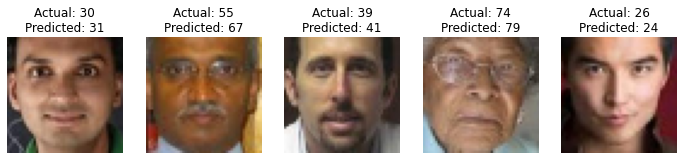

In [10]:
import matplotlib.pyplot as plt

# Select a few test images to display
num_images = 5  # Change this number to display more images
indices = np.random.choice(len(X_test), num_images, replace=False)

plt.figure(figsize=(12, 6))

for i, idx in enumerate(indices):
    plt.subplot(1, num_images, i + 1)
    plt.imshow(X_test[idx].squeeze(), cmap='gray')  # Adjust for grayscale images
    plt.axis("off")
    plt.title(f"Actual: {y_test[idx]}\nPredicted: {int(rounded_predictions[idx][0])}")

plt.show()


SAVE THE MODEL

In [11]:
model.save("age_prediction_model.h5")
print("Model saved successfully!")


Model saved successfully!


MODEL EVALUATION METRICS

In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Get predictions
predictions = model.predict(X_test)
rounded_predictions = np.round(predictions)  # Round predictions for easier interpretation

# Calculate metrics
mae = mean_absolute_error(y_test, rounded_predictions)
mse = mean_squared_error(y_test, rounded_predictions)
r2 = r2_score(y_test, rounded_predictions)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")  # Higher R² means better performance


  3/149 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step

2025-03-04 10:05:17.383049: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 131106816 exceeds 10% of free system memory.


149/149 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step
Mean Absolute Error (MAE): 6.800084352593842
Mean Squared Error (MSE): 90.1231547870097
R² Score: 0.7738219661210365


LOAD THE MODEL AND PREDICT AGES

In [15]:
from tensorflow.keras.models import load_model
from tensorflow.keras.losses import MeanSquaredError

# Load the model with explicit loss function
loaded_model = load_model("age_prediction_model.h5", compile=False)

# Recompile the model with the correct loss function
loaded_model.compile(optimizer="adam", loss=MeanSquaredError(), metrics=["mae"])

print("Model loaded and recompiled successfully!")


Model loaded and recompiled successfully!


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


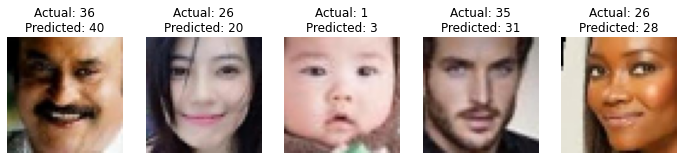

In [16]:
num_samples = 5  # Number of images to display
indices = np.random.choice(len(X_test), num_samples, replace=False)

# Make predictions
predictions = loaded_model.predict(X_test[indices])
rounded_predictions = np.round(predictions).astype(int)  # Round to nearest integer

# Plot images with actual and predicted ages
plt.figure(figsize=(12, 6))
for i, idx in enumerate(indices):
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(X_test[idx].squeeze(), cmap='gray')  # Adjust for grayscale
    plt.axis("off")
    plt.title(f"Actual: {y_test[idx]}\nPredicted: {rounded_predictions[i][0]}")

plt.show()
